# Exploring Key Metrics for Properties in Kuala Lumpur
From Section 1 to 5 we will navigate through data preprocessing, ensuring our dataset is primed for insightful analysis.

For those preferring insights and visuals over technical preprocessing details,\
Feel free to skip to Section 6: Data Visualization.

## 1. Importing Libraries and setup

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

In [110]:
df_raw = pd.read_csv(r"Path", index_col= False)
df_raw.head()

,Price,Type,Size,Region,Bedroom,Bathroom
0,240000,Apartment / Condominium,715 sq.ft.,Taman Desa,3 Bedrooms,2 Bathrooms
1,215000,Apartment / Condominium,855 sq.ft.,Sri Petaling,2 Bedrooms,2 Bathrooms
2,300000,Apartment / Condominium,800 sq.ft.,Setapak,3 Bedrooms,2 Bathrooms
3,231000,Apartment / Condominium,750 sq.ft.,Old Klang Road,3 Bedrooms,2 Bathrooms
4,277000,Apartment / Condominium,714 sq.ft.,Taman Desa,3 Bedrooms,2 Bathrooms


This dataset comprise approximately 19,000 rows of property data located in Kuala Lumpur.

In [111]:
df_raw.shape

(18879, 6)

## 2. Missing Values

In [112]:
df_raw.isnull().any()

Price       False
Type        False
Size        False
Region      False
Bedroom     False
Bathroom    False
dtype: bool

Fortunately there is no Missing Value Found, so we will proceed to the next step which is Feature Formatting

## 3. Feature Formatting

In this area we will be focusing on formatting our columns

Utilizing the .unique() function, we gain insights into the distinct values present in each feature.\
This functionality allows us to locate rows requiring formatting making them suitable for analysis, modeling, or visualization

In [113]:
df_raw["Type"].unique()

array(['Apartment / Condominium', 'House', 'Commercial Property', 'Land'],
      dtype=object)

In [114]:
df_raw["Bathroom"].unique()

array(['2 Bathrooms', '1 Bathroom', '3 Bathrooms', '7 Bathrooms',
       'Office space', '4 Bathrooms', '5 Bathrooms', 'Agricultural',
       '6 Bathrooms', 'Shop lot', 'Residential', 'Mixed Development',
       'Others', '8 Bathrooms', '9 Bathrooms', '10 Bathrooms',
       'More than 10 Bathroom', 'Commercial', 'Warehouse / Factory',
       'Hotel / Resort', 'Retail space', 'Soho', 'Industrial',
       'Terraced House', 'Bungalow House', 'Sovo'], dtype=object)

In [115]:
df_raw["Bedroom"].unique()

array(['3 Bedrooms', '2 Bedrooms', '4 Bedrooms', '1 Bedroom',
       '7 Bedrooms', 'Leasehold', '5 Bedrooms', '6 Bedrooms', 'Freehold',
       '10 Bedrooms', '8 Bedrooms', '9 Bedrooms', 'More than 10 Bedroom'],
      dtype=object)

The dataset reveals only 30 properties with "More than 10 Bedrooms/Bathrooms."\
For this analysis, we will consider them as having only 10 Bedrooms/Bathrooms.

In [116]:
len(df_raw[(df_raw["Bedroom"] == "More than 10 Bedroom") | 
       (df_raw["Bathroom"] == "More than 10 Bathroom")])

30

Several features needs formatting into numerical features\
Such as: "Size", "Bedroom", "Bathroom"

We will utilize str.replace() turning these rows into numerical feature

In [117]:
df = df_raw.copy()
df["Size"] = df["Size"].str.replace(" sq.ft.", "")
df["Bedroom"] = df["Bedroom"].str.replace(" Bedrooms", "")
df["Bedroom"] = df["Bedroom"].str.replace(" Bedroom", "")
df["Bathroom"] = df["Bathroom"].str.replace(" Bathrooms", "")
df["Bathroom"] = df["Bathroom"].str.replace(" Bathroom", "")
df["Bathroom"] = df["Bathroom"].str.replace("More than 10", "10")
df["Bedroom"] = df["Bedroom"].str.replace("More than 10", "10")

In [118]:
df.head(5)

,Price,Type,Size,Region,Bedroom,Bathroom
0,240000,Apartment / Condominium,715,Taman Desa,3,2
1,215000,Apartment / Condominium,855,Sri Petaling,2,2
2,300000,Apartment / Condominium,800,Setapak,3,2
3,231000,Apartment / Condominium,750,Old Klang Road,3,2
4,277000,Apartment / Condominium,714,Taman Desa,3,2


Utilizing the .unique() function,\
We identified additional property types, such as Commercial Property and Land.\
However, as these categories are not within the scope of our analysis, we will remove them from our dataset. 

This subset contains 1,319 rows out of the total 19,000 rows in our dataset.

In [119]:
df[(df["Type"] == "Land") | (df["Type"] == "Commercial Property")].count()

Price       1319
Type        1319
Size        1319
Region      1319
Bedroom     1319
Bathroom    1319
dtype: int64

In [120]:
df.drop(df[df["Type"].str.contains('Land', case=False)].index, inplace=True)
df.drop(df[df["Type"].str.contains('Commercial Property', case=False)].index, inplace = True)

In [121]:
df["Type"].unique()

array(['Apartment / Condominium', 'House'], dtype=object)

As the data was scrapped from property listing websites\
In the "Price" Column\
There are some non-numerical rows, which we will turn it into na using to_numeric and drop it using the dropna method

In [122]:
df.loc[(df['Price'].str.len() > 10)].count()

Price       7
Type        7
Size        7
Region      7
Bedroom     7
Bathroom    7
dtype: int64

In [123]:
df["Price"] = df["Price"].apply(pd.to_numeric, errors = 'coerce')

In [124]:
df.isnull().any()

Price        True
Type        False
Size        False
Region      False
Bedroom     False
Bathroom    False
dtype: bool

In [125]:
df = df.dropna()

After that we will change the feature's datatypes into integers for:\
"Price", "Size", "Bedroom", "Bathroom"

In [126]:
df['Price'] = df['Price'].astype(int)
df['Size'] = df['Size'].astype(int)
df['Bedroom'] = df['Bedroom'].astype(int)
df['Bathroom'] = df['Bathroom'].astype(int)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17553 entries, 0 to 18878
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     17553 non-null  int32 
 1   Type      17553 non-null  object
 2   Size      17553 non-null  int32 
 3   Region    17553 non-null  object
 4   Bedroom   17553 non-null  int32 
 5   Bathroom  17553 non-null  int32 
dtypes: int32(4), object(2)
memory usage: 685.7+ KB


## 4. Categorical Variable

In this section, we will generate categorical variables to enhance our understanding of the dataset.\
By introducing these variables:

- We can efficiently identify outliers.
- We gain deeper insights through categorical analysis.
- They serve as valuable features for data visualization and future machine learning projects.
- We able to enchance interpretability and context within the dataset.

The Price per Square Foot Ratio is a valuable metric for determining the real estate price in each location.\
It's a ratio frequently utilized by property investors to assess property values efficiently.

In [128]:
df["per_sqft"] = (df.Price/df.Size).round(2)

In [129]:
df['per_sqft'] = df['per_sqft'].astype(float)

In [130]:
df.head(5)

,Price,Type,Size,Region,Bedroom,Bathroom,per_sqft
0,240000,Apartment / Condominium,715,Taman Desa,3,2,335.66
1,215000,Apartment / Condominium,855,Sri Petaling,2,2,251.46
2,300000,Apartment / Condominium,800,Setapak,3,2,375.00
3,231000,Apartment / Condominium,750,Old Klang Road,3,2,308.00
4,277000,Apartment / Condominium,714,Taman Desa,3,2,387.96


With the amount of unique regions, its best if we categorize them into few areas

In [131]:
df["Region"].unique()

array(['Taman Desa', 'Sri Petaling', 'Setapak', 'Old Klang Road',
       'Kepong', 'Cheras', 'Desa Petaling', 'KLCC', 'Taman Melawati',
       'Bukit Jalil', 'Setiawangsa', 'KL City', 'Sungai Besi', 'Ampang',
       'Brickfields', 'Taman Permata', 'Bangsar South', 'Solaris Dutamas',
       'Pandan Indah', 'Mont Kiara', 'Others', 'Wangsa Maju',
       'City Centre', 'Sentul', 'Jalan Ipoh', 'Gombak', 'Titiwangsa',
       'Jalan Kuching', 'Pandan Perdana', 'Sri Damansara', 'Segambut',
       'Bukit Tunku', 'Pantai', 'OUG', 'Desa Pandan', 'Pandan Jaya',
       'Taman Tun Dr Ismail', 'KL Sentral', 'Keramat',
       'Bandar Damai Perdana', 'Bukit Bintang', 'Damansara',
       'Bandar Tasik Selatan', 'Taman Duta', 'Chan Sow Lin', 'Pudu',
       'Kuchai Lama', 'Seputeh', 'Bangsar', 'Sri Hartamas',
       'Mid Valley City', 'Ampang Hilir', 'Damansara Heights',
       'Desa ParkCity', 'Jinjang', 'Jalan Sultan Ismail',
       'Bukit Persekutuan', 'Puchong', 'Bandar Menjalara', 'Pekan Batu',
     

In [132]:
len(df["Region"].unique())

69

It is observed that there are 69 distinct locations listed in the "Regions" column, which may be excessive for effective visualization and categorization.\
Based on the map below, we intend to group all 69 unique regions into seven different areas within Kuala Lumpur:

- Red: KL City Center
- Orange: KL Central Areas
- Green: KL Northern Areas
- Dark Blue: KL Eastern Areas
- Brown: KL South Eastern Areas
- Turquoise: KL Southern Areas
- Purple: KL Western Areas

Additionally, regions not within Kuala Lumpur will be categorized under "Selangor Areas".\
This categorization scheme will will also facilitate the implementation of the data into future machine learning projects.

Link: https://github.com/tehraym/data_cleaning_notebook/blob/main/Screenshot%20of%20Kuala%20Lumpur.png 

This Image was created by User: [Mdzafri](https://en.wikipedia.org/wiki/User:Mdzafri)\
Source: https://en.wikipedia.org/wiki/Kuala_Lumpur

In [133]:
categories = {
    'KL City Center': ['KLCC', 'KL City','Bukit Persekutuan', 'City Centre', 'Bukit Bintang', 'Jalan Sultan Ismail'],
    'KL Central Areas': ['Pudu', 'Mid Valley City','KL Sentral', 'Brickfields', 'Bangsar', 'Bangsar South', 'Bukit Ledang', 'KL Eco City', 'Seputeh', 'Chan Sow Lin'],
    'KL Northern Areas': ['Jalan Kuching', 'Taman Melawati', 'Wangsa Maju', 'Setiawangsa', 'Setapak', 'Gombak', 'Segambut', 'Sentul', 'Taman Permata', 'Batu', 'Jalan Ipoh'],
    'KL Eastern Areas': ['Keramat', 'Titiwangsa', 'Ampang', 'Ampang Hilir', 'Pandan Indah', 'Pandan Perdana', 'Pandan Jaya', 'Desa Pandan'],
    'KL South Eastern Areas': ['Cheras', 'Desa Petaling', 'Bandar Damai Perdana', 'Bandar Tasik Selatan', 'Pekan Batu'],
    'KL Southern Areas': ['Bukit Jalil', 'Kuchai Lama', 'Old Klang Road', 'Sri Petaling', 'Taman Desa', 'Sungai Besi', 'Salak Selatan', 'Pantai', 'OUG'],
    'KL Western Areas': ['Taman Duta', 'Bukit Tunku', 'Mont Kiara', 'Sri Hartamas', 'Damansara Heights', 'Solaris Dutamas', 'Desa Damansara', 'Taman Tun Dr Ismail', 'Kepong', 'Desa ParkCity', 'Sri Damansara', 'Damansara', 'Bandar Menjalara', 'Jinjang', 'Sungai Penchala', 'Country Heights Damansara',],
    'Selangor Areas': ['Puchong', 'Serdang', 'Setia Eco Park', 'Country Heights']
}
#Number of rows for each Categories
for category, locations in categories.items():
    count = df["Region"].isin(locations).sum()
    print(f"{category}, {count}")

KL City Center, 700
KL Central Areas, 551
KL Northern Areas, 6212
KL Eastern Areas, 1742
KL South Eastern Areas, 3589
KL Southern Areas, 2245
KL Western Areas, 2391
Selangor Areas, 88


In [134]:
#Creating a new column and assigning the new categories for each "Region" column
df["reg_cat"] = ''

for category, areas in categories.items():
    df.loc[df['Region'].isin(areas), 'reg_cat'] = category

df.head()

,Price,Type,Size,Region,Bedroom,Bathroom,per_sqft,reg_cat
0,240000,Apartment / Condominium,715,Taman Desa,3,2,335.66,KL Southern Areas
1,215000,Apartment / Condominium,855,Sri Petaling,2,2,251.46,KL Southern Areas
2,300000,Apartment / Condominium,800,Setapak,3,2,375.00,KL Northern Areas
3,231000,Apartment / Condominium,750,Old Klang Road,3,2,308.00,KL Southern Areas
4,277000,Apartment / Condominium,714,Taman Desa,3,2,387.96,KL Southern Areas


To check if any other regions was left behind

In [135]:
df.loc[df["reg_cat"] == ''].head()

,Price,Type,Size,Region,Bedroom,Bathroom,per_sqft,reg_cat
71,1890000,Apartment / Condominium,2960,Others,5,4,638.51,
1399,2750000,House,5589,Others,7,7,492.04,
1597,499000,House,1080,Others,4,3,462.04,
1882,3400000,House,3400,Others,9,5,1000.00,
2093,365555,House,2074,Others,4,3,176.26,


We will drop off "Others" in "Region" column

In [136]:
df.drop(df[df["Region"] == "Others"].index, axis = 0, inplace = True)

In [137]:
df.loc[df["reg_cat"] == ''].head()

,Price,Type,Size,Region,Bedroom,Bathroom,per_sqft,reg_cat


### Coordinates
It is important to have some sort of variables that can approximately locate each property's region\
I have tried different ways to add variables that can determine each Region's Locations (If you are interested do refer my other folder)

Coordinates for each Areas will be added in\
(These coordinates had been manually sourced in google)

In [138]:
coords_area = {
    'KL City Center': [3.140853, 101.693207],
    'KL Central Areas': [3.129225, 101.686139],
    'KL Northern Areas': [3.1982, 101.6812],
    'KL Eastern Areas': [3.1583, 101.7350],
    'KL South Eastern Areas': [3.0816, 101.7361],
    'KL Southern Areas': [3.074025, 101.684732],
    'KL Western Areas': [3.169569, 101.652802],
    'Selangor Areas': [3.048999, 101.647019]
}

for i, cat in categories.items():
    df.loc[df['reg_cat'] == i, 'len_region'] = len(cat)

for i, coords in coords_area.items():
    df.loc[df['reg_cat'] == i, 'long_area'] = coords[1]
    df.loc[df['reg_cat'] == i, 'lat_area'] = coords[0]

Coordinates for each region will be included.\
These coordinates were scraped from Google using Playwright and have been verified in Tableau to ensure their accuracy.

In [139]:
coords_reg = {
    'Taman Desa': [3.1030, 101.6845], 'Sri Petaling': [3.0684, 101.6856], 
    'Setapak': [3.2791, 101.7410], 'Old Klang Road': [3.0917, 101.6746],'Kepong': [3.2140, 101.6356], 
    'Cheras': [3.1068, 101.7259], 'Desa Petaling': [3.0835, 101.7105], 
    'KLCC': [3.1466, 101.6958], 'Taman Melawati': [3.2126, 101.7471], 
    'Bukit Jalil': [3.0587, 101.6917], 'Setiawangsa': [3.1830, 101.7462], 
    'KL City': [3.1499, 101.6945], 'Sungai Besi': [3.0574, 101.7179], 
    'Ampang': [3.1491, 101.7625], 'Brickfields': [3.1292, 101.6861], 
    'Taman Permata': [3.2067, 101.7521], 'Bangsar South': [3.1106, 101.6663], 
    'Solaris Dutamas': [3.1709, 101.6661], 'Pandan Indah': [3.1339, 101.7517], 
    'Mont Kiara': [3.1685, 101.6512], 'Wangsa Maju': [3.2038, 101.7367], 
    'City Centre': [3.1466, 101.6958], 'Sentul': [3.2066, 101.6820], 
    'Jalan Ipoh': [3.1752, 101.6866], 'Gombak': [3.2535, 101.6533], 
    'Titiwangsa': [3.1774, 101.7077], 'Jalan Kuching': [3.1854, 101.6713],
    'Pandan Perdana': [3.1172, 101.7421], 'Sri Damansara': [3.1926, 101.6105], 
    'Segambut': [3.1917, 101.6734], 'Bukit Tunku': [3.1665, 101.6828], 
    'Pantai': [3.1114, 101.6622], 'OUG': [3.0726, 101.6731], 
    'Desa Pandan': [3.1470, 101.7373], 'Pandan Jaya': [3.1354, 101.7401], 
    'Taman Tun Dr Ismail': [3.1461, 101.6255], 'KL Sentral': [3.1342, 101.6861], 
    'Keramat': [3.1689, 101.7277], 'Bandar Damai Perdana': [3.0473, 101.7408], 
    'Bukit Bintang': [3.1468, 101.7113], 'Damansara': [3.1491, 101.6534], 
    'Bandar Tasik Selatan': [3.0720, 101.7096], 'Taman Duta': [3.1608, 101.6759], 
    'Chan Sow Lin': [3.1278, 101.7156], 'Pudu': [3.1348, 101.7136], 
    'Kuchai Lama': [3.0839, 101.6883], 'Seputeh': [3.1150, 101.6797], 
    'Bangsar': [3.1290, 101.6798], 'Sri Hartamas': [3.1600, 101.6520], 
    'Mid Valley City': [3.1172, 101.6781], 'Ampang Hilir': [3.1540, 101.7446], 
    'Damansara Heights': [3.1491, 101.6534], 'Desa ParkCity': [3.1862, 101.6299], 
    'Jinjang': [3.2110, 101.6423], 'Jalan Sultan Ismail': [3.1556, 101.7051],
    'Bukit Persekutuan': [3.1378, 101.6794], 'Puchong': [3.0327, 101.6188], 
    'Bandar Menjalara': [3.1939, 101.6309], 'Pekan Batu': [3.0714, 101.7688], 
    'Salak Selatan': [3.1049, 101.7055], 'Sungai Penchala': [3.1620, 101.6245], 
    'KL Eco City': [3.118, 101.673],'Batu': [3.2041, 101.6729], 
    'Serdang': [5.2101, 100.6124], 'Bukit Ledang': [3.1505, 101.6713],
    'Country Heights Damansara': [3.1784, 101.6211], 'Country Heights': [2.9935, 101.7403], 
    'Setia Eco Park': [3.1121, 101.4765]
}

for i, area in coords_reg.items():
    df.loc[df['Region'] == i, 'long_reg'] = area[1]
    df.loc[df['Region'] == i, 'lat_reg'] = area[0]

In [163]:
df.head()

,Price,Type,Size,Region,Bedroom,Bathroom,per_sqft,reg_cat,len_region,long_area,lat_area,long_reg,lat_reg
0,240000,Apartment / Condominium,715,Taman Desa,3,2,335.66,KL Southern Areas,9.00,101.68,3.07,101.68,3.10
1,215000,Apartment / Condominium,855,Sri Petaling,2,2,251.46,KL Southern Areas,9.00,101.68,3.07,101.69,3.07
2,300000,Apartment / Condominium,800,Setapak,3,2,375.00,KL Northern Areas,11.00,101.68,3.20,101.74,3.28
3,231000,Apartment / Condominium,750,Old Klang Road,3,2,308.00,KL Southern Areas,9.00,101.68,3.07,101.67,3.09
4,277000,Apartment / Condominium,714,Taman Desa,3,2,387.96,KL Southern Areas,9.00,101.68,3.07,101.68,3.10


## 5. Handling Outliers

In this segment, our focus is on locating and addressing outliers and entries that lack logical coherence.\
Examining the dataset reveals that the initial few rows exhibit inconsistencies.

### 5a. Using Statistical Methods to identify outliers

We will use two method to identify outliers which are
- The Z-Score Method
- The IQR Method

We will use these two satistical method on column "per_sqft", allowing more straightforward comparison.\
Allows us to identify properties that are significantly under/overpriced

The Z-Score Method

In [140]:
#The Z_Score Method
def z_identify_outliers(data, mode = 'lower'):
    col = []
    x = 1.0
    y = -1.0
    mean = np.mean(data)
    std = np.std(data)
    if mode == 'upper':
        for i in data:
            z = (i - mean)/std
            if z > x:
                col.append(i)
    elif mode == 'lower':
        for i in data:
            z = (i - mean)/std
            if z < y:
                col.append(i)    
    return col
print(f"Total Positive Z-Score outliers: {len(df[df["per_sqft"].isin(z_identify_outliers(df["per_sqft"], 'upper'))])}")
df[df["per_sqft"].isin(z_identify_outliers(df["per_sqft"], 'upper'))]

Total Positive Z-Score outliers: 9


,Price,Type,Size,Region,Bedroom,Bathroom,per_sqft,reg_cat,len_region,long_area,lat_area,long_reg,lat_reg
486,8000000,Apartment / Condominium,820,KL City,3,2,9756.10,KL City Center,6.00,101.69,3.14,101.69,3.15
4268,1250000,Apartment / Condominium,117,Bukit Jalil,3,2,10683.76,KL Southern Areas,9.00,101.68,3.07,101.69,3.06
5666,1000000,Apartment / Condominium,1,Mont Kiara,6,6,1000000.00,KL Western Areas,16.00,101.65,3.17,101.65,3.17
8491,1140000,Apartment / Condominium,17,Bukit Jalil,4,4,67058.82,KL Southern Areas,9.00,101.68,3.07,101.69,3.06
11964,1250000,House,38,Cheras,5,5,32894.74,KL South Eastern Areas,5.00,101.74,3.08,101.73,3.11
15739,4300000,Apartment / Condominium,450,Ampang,2,2,9555.56,KL Eastern Areas,8.00,101.73,3.16,101.76,3.15
16051,300000,Apartment / Condominium,8,Cheras,3,2,37500.00,KL South Eastern Areas,5.00,101.74,3.08,101.73,3.11
18311,290000000,Apartment / Condominium,851,Kepong,3,2,340775.56,KL Western Areas,16.00,101.65,3.17,101.64,3.21
18314,5800000,Apartment / Condominium,570,Pudu,1,1,10175.44,KL Central Areas,10.00,101.69,3.13,101.71,3.13


In [141]:
print(f"Total Negative Z-Score outliers: {len(df[df["per_sqft"].isin(z_identify_outliers(df["per_sqft"], 'lower'))])}")
df[df["per_sqft"].isin(z_identify_outliers(df["per_sqft"], 'lower'))]

Total Negative Z-Score outliers: 0


,Price,Type,Size,Region,Bedroom,Bathroom,per_sqft,reg_cat,len_region,long_area,lat_area,long_reg,lat_reg


The IQR Method

In [142]:
#The IQR Method

def iqr_identify_outliers(data, mode = 'lower'):
    col = []
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    if mode == 'upper':
        for i in data:
            if i > upper:
                col.append(i)
    elif mode == 'lower':
        for i in data:
            if i < lower:
                col.append(i)
    return col
print(f"Total Upper Bound's Outliers: {len(df[df["per_sqft"].isin(iqr_identify_outliers(df["per_sqft"], 'upper'))])} Rows")
df[df["per_sqft"].isin(iqr_identify_outliers(df["per_sqft"], 'upper'))].head(5)

Total Upper Bound's Outliers: 975 Rows


,Price,Type,Size,Region,Bedroom,Bathroom,per_sqft,reg_cat,len_region,long_area,lat_area,long_reg,lat_reg
14,1380000,Apartment / Condominium,1260,KLCC,3,3,1095.24,KL City Center,6.00,101.69,3.14,101.70,3.15
70,980000,Apartment / Condominium,850,KL City,1,1,1152.94,KL City Center,6.00,101.69,3.14,101.69,3.15
139,12800000,House,8423,Bukit Tunku,7,7,1519.65,KL Western Areas,16.00,101.65,3.17,101.68,3.17
159,570000,Apartment / Condominium,622,Ampang,1,1,916.40,KL Eastern Areas,8.00,101.73,3.16,101.76,3.15
179,420000,Apartment / Condominium,495,Mont Kiara,2,2,848.48,KL Western Areas,16.00,101.65,3.17,101.65,3.17


In [143]:
print(f"Total Lower Bound outliers: {len(df[df["per_sqft"].isin(iqr_identify_outliers(df["per_sqft"], 'lower'))])} Rows")
df[df["per_sqft"].isin(iqr_identify_outliers(df["per_sqft"], 'lower'))].head()

Total Lower Bound outliers: 19 Rows


,Price,Type,Size,Region,Bedroom,Bathroom,per_sqft,reg_cat,len_region,long_area,lat_area,long_reg,lat_reg
589,17000,House,4500,Ampang,7,6,3.78,KL Eastern Areas,8.00,101.73,3.16,101.76,3.15
3856,1400000,House,37070,Taman Duta,10,8,37.77,KL Western Areas,16.00,101.65,3.17,101.68,3.16
4245,320000,Apartment / Condominium,330000,Cheras,3,2,0.97,KL South Eastern Areas,5.00,101.74,3.08,101.73,3.11
4288,2290000,House,59000,Sri Petaling,5,3,38.81,KL Southern Areas,9.00,101.68,3.07,101.69,3.07
4846,46500,House,1600,Cheras,4,3,29.06,KL South Eastern Areas,5.00,101.74,3.08,101.73,3.11


Upon reviewing the outcomes of both methods for outlier identification, we will leverage the following results:

- Positive Z-Score outliers will help identify data points that exceed the Third Quartile (Q3).
- The Lower Bound Interquartile Range (IQR) will aid in identifying outliers significantly below the First Quartile (Q1).

In [144]:
outliers_df = pd.concat([df[df["per_sqft"].isin(z_identify_outliers(df["per_sqft"], 'upper'))],
                         df[df["per_sqft"].isin(iqr_identify_outliers(df["per_sqft"], 'lower'))]])
outliers_df.head()

,Price,Type,Size,Region,Bedroom,Bathroom,per_sqft,reg_cat,len_region,long_area,lat_area,long_reg,lat_reg
486,8000000,Apartment / Condominium,820,KL City,3,2,9756.10,KL City Center,6.00,101.69,3.14,101.69,3.15
4268,1250000,Apartment / Condominium,117,Bukit Jalil,3,2,10683.76,KL Southern Areas,9.00,101.68,3.07,101.69,3.06
5666,1000000,Apartment / Condominium,1,Mont Kiara,6,6,1000000.00,KL Western Areas,16.00,101.65,3.17,101.65,3.17
8491,1140000,Apartment / Condominium,17,Bukit Jalil,4,4,67058.82,KL Southern Areas,9.00,101.68,3.07,101.69,3.06
11964,1250000,House,38,Cheras,5,5,32894.74,KL South Eastern Areas,5.00,101.74,3.08,101.73,3.11


In [145]:
df = df.drop(outliers_df.index)

### 5b. Using business logic identify outliers
Properties investors and enthusiast usually will tell you that 
- A bedroom is typically minimum 120 sqft.

By using this business logic, a function is constructed to pinpoint such outliers

In [146]:
df[(df.Size/df.Bedroom) < 120].head()

,Price,Type,Size,Region,Bedroom,Bathroom,per_sqft,reg_cat,len_region,long_area,lat_area,long_reg,lat_reg
3451,200000,Apartment / Condominium,650,Kepong,6,2,307.69,KL Western Areas,16.00,101.65,3.17,101.64,3.21
3618,145000,Apartment / Condominium,62,Ampang,2,1,2338.71,KL Eastern Areas,8.00,101.73,3.16,101.76,3.15
4080,525000,House,100,Setapak,3,3,5250.00,KL Northern Areas,11.00,101.68,3.20,101.74,3.28
5247,588000,House,100,Bandar Menjalara,3,2,5880.00,KL Western Areas,16.00,101.65,3.17,101.63,3.19
5814,299500,Apartment / Condominium,341,Ampang Hilir,3,2,878.30,KL Eastern Areas,8.00,101.73,3.16,101.74,3.15


We will proceed to remove these outliers

In [147]:
clean_df = df[~(df.Size/df.Bedroom < 120)]

By using .sort_values\
We are checking if there is any other rows that does not make sense

In [148]:
clean_df.sort_values(by = "Size").head(5)

,Price,Type,Size,Region,Bedroom,Bathroom,per_sqft,reg_cat,len_region,long_area,lat_area,long_reg,lat_reg
17902,220000,Apartment / Condominium,280,Ampang,1,1,785.71,KL Eastern Areas,8.00,101.73,3.16,101.76,3.15
16914,230000,Apartment / Condominium,280,Keramat,1,1,821.43,KL Eastern Areas,8.00,101.73,3.16,101.73,3.17
11953,230000,Apartment / Condominium,280,Keramat,1,1,821.43,KL Eastern Areas,8.00,101.73,3.16,101.73,3.17
14352,230000,Apartment / Condominium,280,Ampang,1,1,821.43,KL Eastern Areas,8.00,101.73,3.16,101.76,3.15
1238,230000,Apartment / Condominium,280,Keramat,1,1,821.43,KL Eastern Areas,8.00,101.73,3.16,101.73,3.17


In [149]:
clean_df.sort_values(by = "Size", ascending = False).head(5)

,Price,Type,Size,Region,Bedroom,Bathroom,per_sqft,reg_cat,len_region,long_area,lat_area,long_reg,lat_reg
3837,19000000,House,87120,Sungai Penchala,10,10,218.09,KL Western Areas,16.00,101.65,3.17,101.62,3.16
7048,9700000,House,81675,Sungai Penchala,6,6,118.76,KL Western Areas,16.00,101.65,3.17,101.62,3.16
10918,85000000,House,74583,City Centre,10,10,1139.67,KL City Center,6.00,101.69,3.14,101.70,3.15
17629,10000000,House,45961,Damansara,7,6,217.58,KL Western Areas,16.00,101.65,3.17,101.65,3.15
16461,10000000,House,45961,Damansara,7,5,217.58,KL Western Areas,16.00,101.65,3.17,101.65,3.15


In [150]:
clean_df.sort_values(by = "Price").head()

,Price,Type,Size,Region,Bedroom,Bathroom,per_sqft,reg_cat,len_region,long_area,lat_area,long_reg,lat_reg
12129,90000,Apartment / Condominium,650,Cheras,2,1,138.46,KL South Eastern Areas,5.00,101.74,3.08,101.73,3.11
17803,95000,Apartment / Condominium,480,Kuchai Lama,2,1,197.92,KL Southern Areas,9.00,101.68,3.07,101.69,3.08
8097,98000,Apartment / Condominium,458,Kuchai Lama,2,1,213.97,KL Southern Areas,9.00,101.68,3.07,101.69,3.08
17621,98000,Apartment / Condominium,520,Kuchai Lama,2,1,188.46,KL Southern Areas,9.00,101.68,3.07,101.69,3.08
2534,98000,Apartment / Condominium,520,Kuchai Lama,2,1,188.46,KL Southern Areas,9.00,101.68,3.07,101.69,3.08


In [151]:
clean_df.sort_values(by = "Price", ascending = False).head()

,Price,Type,Size,Region,Bedroom,Bathroom,per_sqft,reg_cat,len_region,long_area,lat_area,long_reg,lat_reg
10918,85000000,House,74583,City Centre,10,10,1139.67,KL City Center,6.00,101.69,3.14,101.70,3.15
12796,54000000,House,10000,Bangsar,9,10,5400.00,KL Central Areas,10.00,101.69,3.13,101.68,3.13
18251,54000000,House,10000,Bangsar,7,9,5400.00,KL Central Areas,10.00,101.69,3.13,101.68,3.13
16351,35000000,House,20000,Brickfields,10,10,1750.00,KL Central Areas,10.00,101.69,3.13,101.69,3.13
14924,33000000,House,10000,Bangsar,9,10,3300.00,KL Central Areas,10.00,101.69,3.13,101.68,3.13


Seems like everything is in order\
We will proceed to draw a couple of visualizations of key metrics that are insightful to Properties investors and buyers in the Kuala Lumpur Region.

At the same time the clean_df will be used to make an interactive dashboard using Tableau\
https://public.tableau.com/app/profile/raymond.teh/viz/ExploringKeyMetricsforpropertiesinKualaLumpur/Dashboard1 

## 6. Data Visualisation

In this section, we will quickly look at the summary statistics and create informative visualizations that highlight key insights

### 6a. Summary Statistics
By using clean_df.describe()\
It presents us the summary statistics for landed/high rise properties in Kuala Lumpur\
Several key factos has identified as below:

- There are 17479 rows of non-null values in each columns

- The columns for Price and Size exhibit notably high standard deviations.\
(This may be attributed to the diverse range of property prices and sizes across affluent and less affluent regions.)

- Surprisingly, the standard deviation of per_sqft is lower compared to Price and Size.

- The number of Bedrooms/Bathrooms indicates some variablility amongst the propeties, which is normal

In [153]:
pd.set_option('display.float_format', '{:.2f}'.format)
clean_df.describe()

,Price,Size,Bedroom,Bathroom,per_sqft,len_region,long_area,lat_area,long_reg,lat_reg
count,17479.00,17479.00,17479.00,17479.00,17479.00,17479.00,17479.00,17479.00,17479.00,17479.00
mean,785221.47,1560.61,3.35,2.44,477.27,9.63,101.69,3.15,101.71,3.16
std,1515934.54,2071.27,1.15,1.19,244.19,3.40,0.03,0.05,0.04,0.08
min,90000.00,280.00,1.00,1.00,56.44,4.00,101.65,3.05,100.61,2.99
25%,340000.00,850.00,3.00,2.00,344.22,6.00,101.68,3.08,101.68,3.11
50%,499000.00,1080.00,3.00,2.00,420.22,10.00,101.68,3.16,101.73,3.17
75%,750000.00,1518.00,4.00,3.00,543.45,11.00,101.73,3.20,101.74,3.21
max,85000000.00,87120.00,10.00,10.00,6666.67,16.00,101.74,3.20,101.77,5.21


Dataframe below illustrates that the per_sqft ratio serves as a reliable metric for assessing the value of a property within a specific region.\
While standard deviation of property prices and sizes may vary, the standard deviation of per_sqft ratio demonstrates consistency across different properties in the region.

In [154]:
results = []
for i, category in categories.items():
    for region in category:
            house = clean_df[(clean_df["Region"] == region)]
            count = len(house.Price)
            avg_price = round(np.mean(house.Price), 2)
            std_price = round(np.std(house.Price), 2)
            avg_size = round(np.mean(house.Size), 2)
            std_size = round(np.std(house.Size), 2)
            avg_sqft = round(np.mean(house.per_sqft), 2)
            std_sqft = round(np.std(house.per_sqft), 2)
            results.append([i, region, count, avg_price, std_price, avg_size, std_size, avg_sqft, std_sqft])

df_std = pd.DataFrame(results, columns = ['category', 'regions', 'count', 'avg_price', 'std_price', 'avg_size', 'std_size', 'avg_per_sqft', "std_per_sqft"])
df_std

,category,regions,count,avg_price,std_price,avg_size,std_size,avg_per_sqft,std_per_sqft
0,KL City Center,KLCC,270,1388400.62,2156636.06,1399.37,1331.71,965.42,528.28
1,KL City Center,KL City,237,870126.48,1114171.96,1262.69,1068.82,690.95,336.25
2,KL City Center,Bukit Persekutuan,2,5900000.00,0.00,12330.00,90.00,478.54,3.49
3,KL City Center,City Centre,55,3246366.15,11986316.89,3651.98,10144.88,567.37,241.53
4,KL City Center,Bukit Bintang,88,1001468.75,893248.37,1068.35,480.02,960.87,665.49
5,KL City Center,Jalan Sultan Ismail,47,615295.40,385416.09,819.96,302.91,765.81,302.49
6,KL Central Areas,Pudu,40,531572.15,234239.01,1087.68,356.32,506.70,233.17
7,KL Central Areas,Mid Valley City,20,720623.40,396504.74,1020.40,409.00,788.39,659.57
8,KL Central Areas,KL Sentral,21,1574000.00,1151103.28,1555.67,807.57,1002.78,396.51
9,KL Central Areas,Brickfields,66,1671298.47,5723917.33,2024.97,4742.96,568.84,229.42


### 6b. Informative Visualization of the data
In this section, we will delve deeper into the cleaned dataset and create informative visualizations.\
Leveraging our refined dataset, we'll extract the following variables:

- Average Size: Reflects the mean size of properties in a particular region.
- Average Price: Illustrates the mean price of properties in a specific region.
- Average Price per_sqft: Displays the mean price per square foot of properties in a given region.
- Average Number of Toilets/Bedrooms: Shows the mean number of toilets/bedrooms across properties in a particular region.

We will also drop rows that contain Null Values

In [155]:
results = []
types = ['Apartment / Condominium', 'House']
for i, category in categories.items():
    for region in category:
        for type in types:
            house = clean_df[(clean_df["Region"] == region) & (clean_df["Type"] == type)]
            count = len(house.Price)
            avg_price = round(np.mean(house.Price), 2)
            avg_size = round(np.mean(house.Size), 2)
            avg_sqft = round(np.mean(house.per_sqft), 2)
            avg_bed = round(np.mean(house.Bedroom), 0)
            avg_bath = round(np.mean(house.Bathroom), 0)
            results.append([i, region, type, count, avg_price, avg_size, avg_sqft, avg_bed, avg_bath])

df_avg = pd.DataFrame(results, columns = ['category', 'regions', 'type', 'count', 'avg_price(RM)', 'avg_size(sqft)', 'avg_per_sqft(RM)', 'avg_bed', 'avg_bath'])
df_avg = df_avg.dropna()
df_avg

,category,regions,type,count,avg_price(RM),avg_size(sqft),avg_per_sqft(RM),avg_bed,avg_bath
0,KL City Center,KLCC,Apartment / Condominium,266,1262173.56,1317.88,959.80,3.00,2.00
1,KL City Center,KLCC,House,4,9782500.00,6818.25,1339.40,5.00,6.00
2,KL City Center,KL City,Apartment / Condominium,214,741859.70,1092.48,707.31,3.00,2.00
3,KL City Center,KL City,House,23,2063565.22,2846.43,538.73,4.00,3.00
5,KL City Center,Bukit Persekutuan,House,2,5900000.00,12330.00,478.54,7.00,6.00
6,KL City Center,City Centre,Apartment / Condominium,48,784794.54,1614.08,520.37,3.00,3.00
7,KL City Center,City Centre,House,7,20125714.29,17626.14,889.63,6.00,6.00
8,KL City Center,Bukit Bintang,Apartment / Condominium,88,1001468.75,1068.35,960.87,2.00,2.00
10,KL City Center,Jalan Sultan Ismail,Apartment / Condominium,47,615295.40,819.96,765.81,2.00,2.00
12,KL Central Areas,Pudu,Apartment / Condominium,40,531572.15,1087.68,506.70,3.00,2.00


In [156]:
df_avg.to_csv('df_avg.csv')

After that we will utilize Seaborn and Matplotlib to plot some bar charts for
- Average Price per_sqft (RM) for High Rise Properties/Landed Properties in Kuala Lumpur
- Average Number of Bedrooms for High Rise Properties/Landed Properties in Kuala Lumpur

Disclaimer: Some regions may lack sufficient data to determine the price per square foot.\
Therefore, the count of available data points is provided on the right side of each barplot.

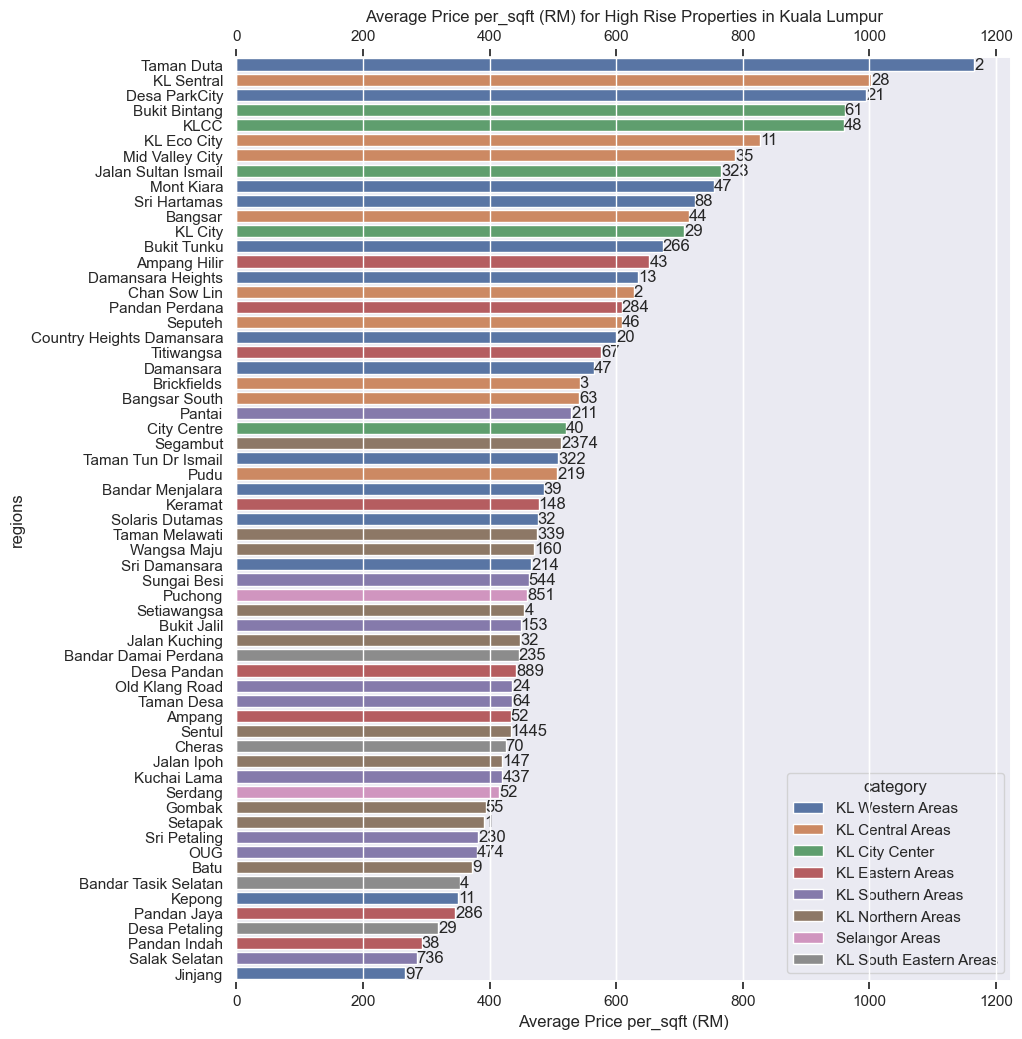

In [157]:
data = df_avg[df_avg['type'] == 'Apartment / Condominium'].sort_values(by = 'avg_per_sqft(RM)', ascending = False)
sns.set_theme()
fig, ax1 = plt.subplots(figsize=(10, 12))
sns.barplot(data=data, y='regions', x='avg_per_sqft(RM)', hue='category', ax=ax1)
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
plt.title('Average Price per_sqft (RM) for High Rise Properties in Kuala Lumpur')
ax1.set_xlabel('Average Price per_sqft (RM)')
for i, bar in enumerate(ax1.patches):
    if i < len(data):
        count = data['count'].iloc[i]
        ax1.text(bar.get_width(), (bar.get_y() + bar.get_height() / 2), f'{count}', 
                 va='center', ha='left')

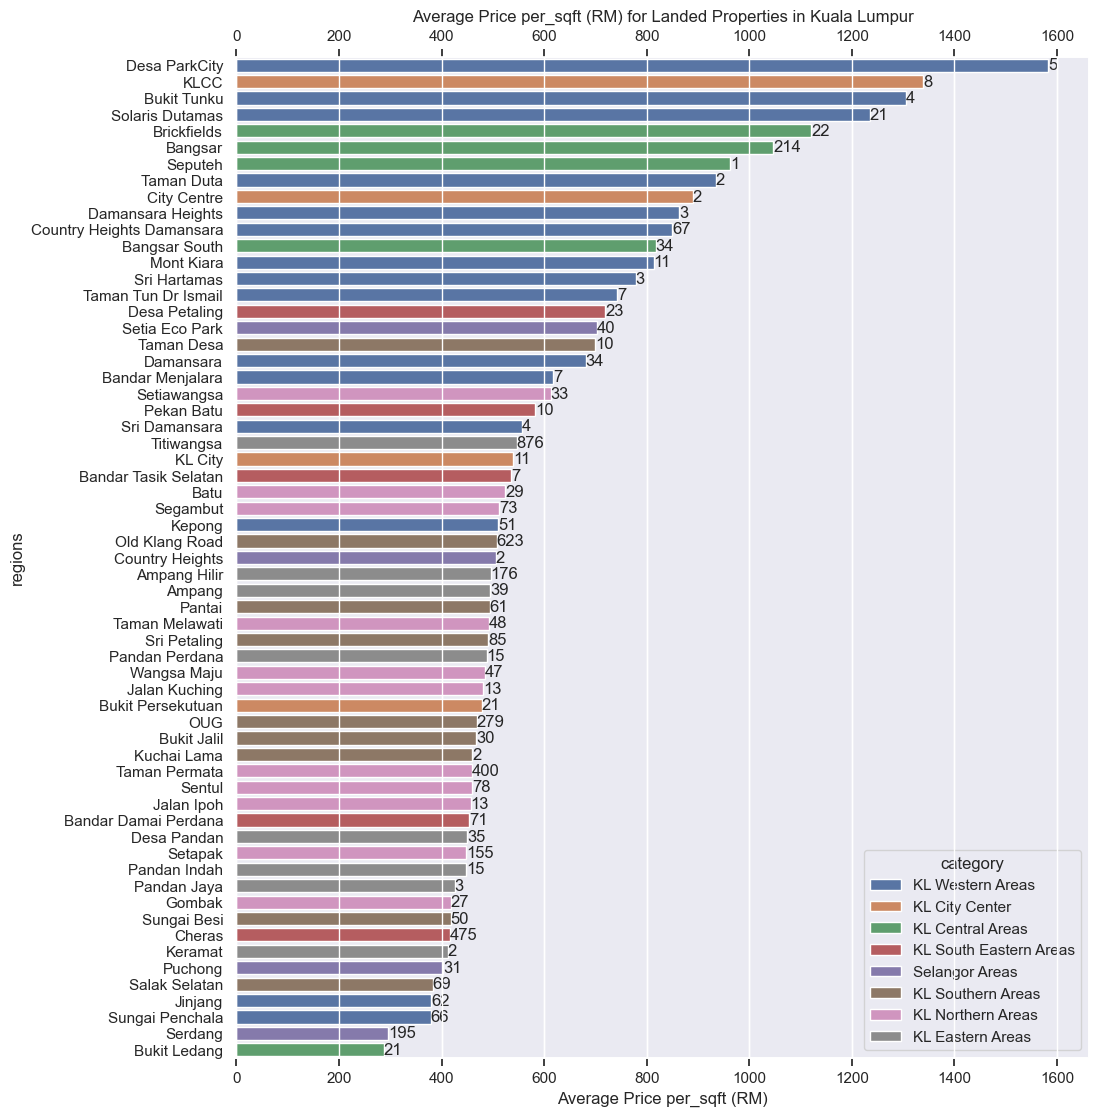

In [158]:
data = df_avg[df_avg['type'] == 'House'].sort_values(by = 'avg_per_sqft(RM)', ascending = False)
sns.set_theme()
fig, ax1 = plt.subplots(figsize=(11, 13))
sns.barplot(data=data, y='regions', x='avg_per_sqft(RM)', hue='category', ax=ax1)
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
plt.title('Average Price per_sqft (RM) for Landed Properties in Kuala Lumpur')
ax1.set_xlabel('Average Price per_sqft (RM)')
for i , bar in enumerate(ax1.patches):
    if i < len(data):
        count = data['count'].iloc[i]
        ax1.text(bar.get_width(), (bar.get_y() + bar.get_height()/2), f'{count}',
                 va = 'center', ha = 'left')

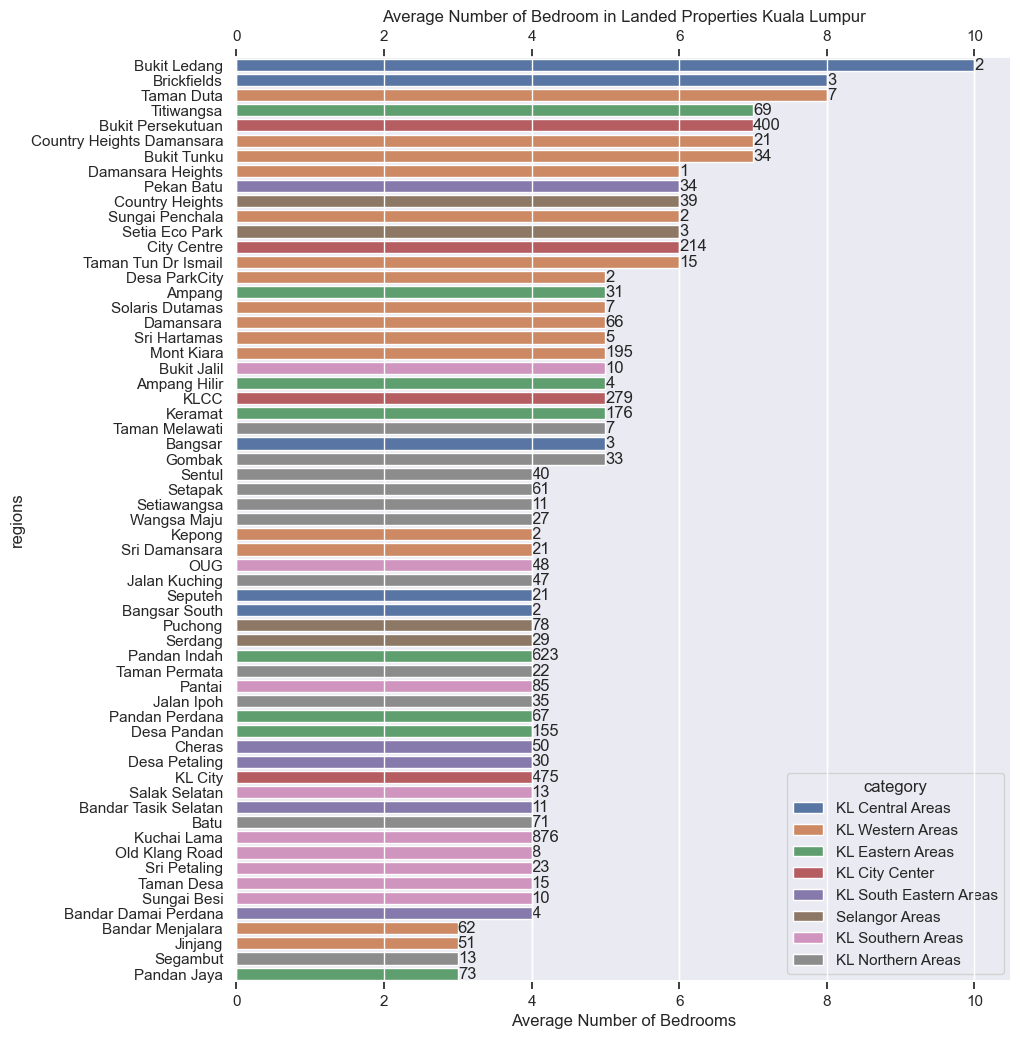

In [159]:
data = df_avg[df_avg['type'] == 'House'].sort_values(by = 'avg_bed', ascending = False)
f, ax1 = plt.subplots(figsize = (10,12))
sns.barplot(data = data, x = 'avg_bed', y = 'regions', hue = 'category', ax = ax1)
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
plt.title("Average Number of Bedroom in Landed Properties Kuala Lumpur")
ax1.set_xlabel("Average Number of Bedrooms")
for i , bar in enumerate(ax1.patches):
    if i < len(data):
        count = data['count'].iloc[i]
        ax1.text(bar.get_width(), (bar.get_y() + bar.get_height()/2), f'{count}',
                    va = 'center', ha = 'left')

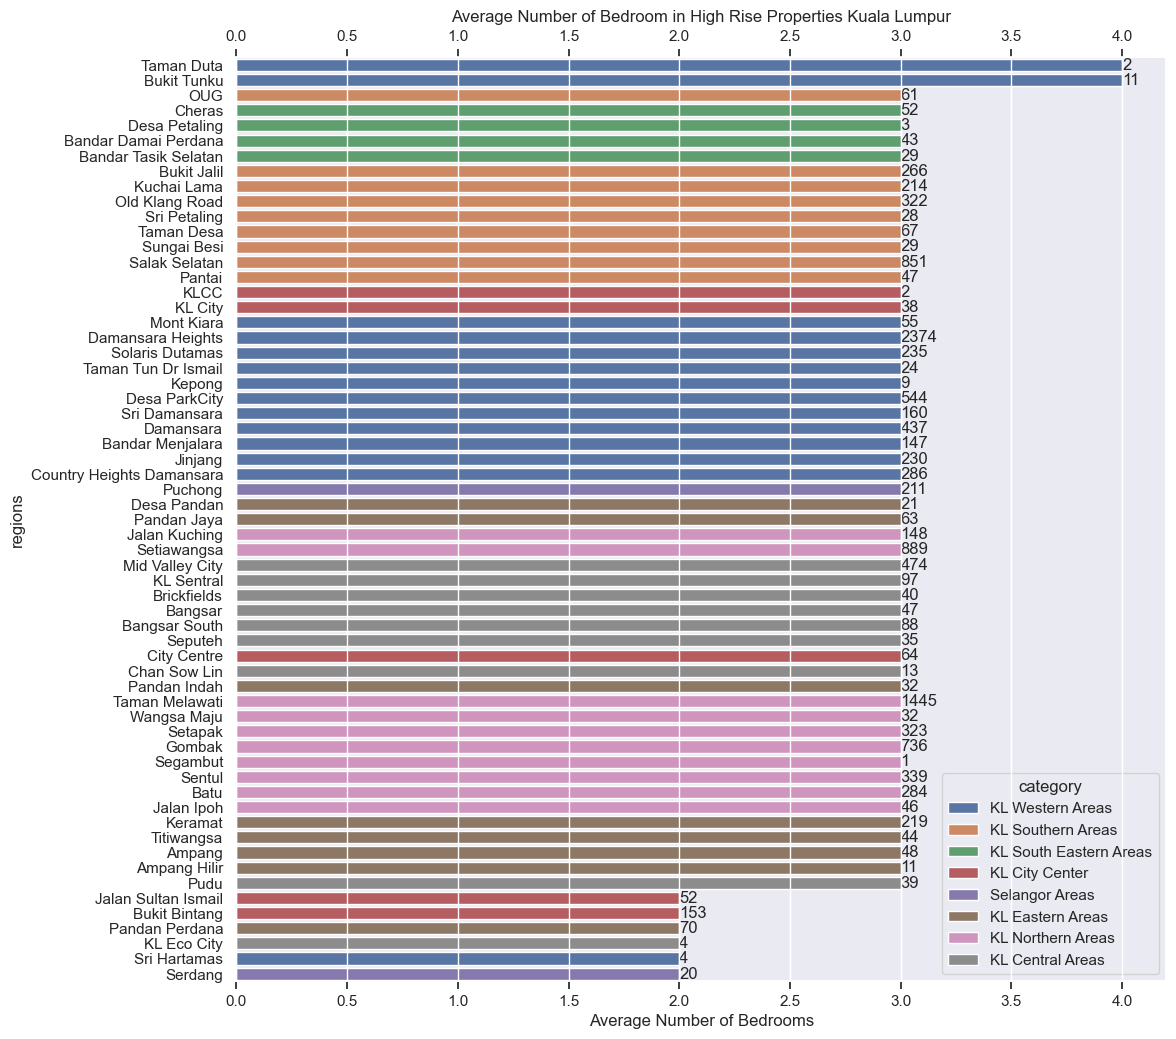

In [160]:
data = df_avg[df_avg['type'] == 'Apartment / Condominium'].sort_values(by = 'avg_bed', ascending = False)
f, ax1 = plt.subplots(figsize = (12,12))
sns.barplot(data = data, x = 'avg_bed', y = 'regions', hue = 'category', ax = ax1)
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
plt.title("Average Number of Bedroom in High Rise Properties Kuala Lumpur")
ax1.set_xlabel('Average Number of Bedrooms')
for i , bar in enumerate(ax1.patches):
    if i < len(data):
        count = data['count'].iloc[i]
        ax1.text(bar.get_width(), (bar.get_y() + bar.get_height()/2), f'{count}',
                    va = 'center', ha = 'left')

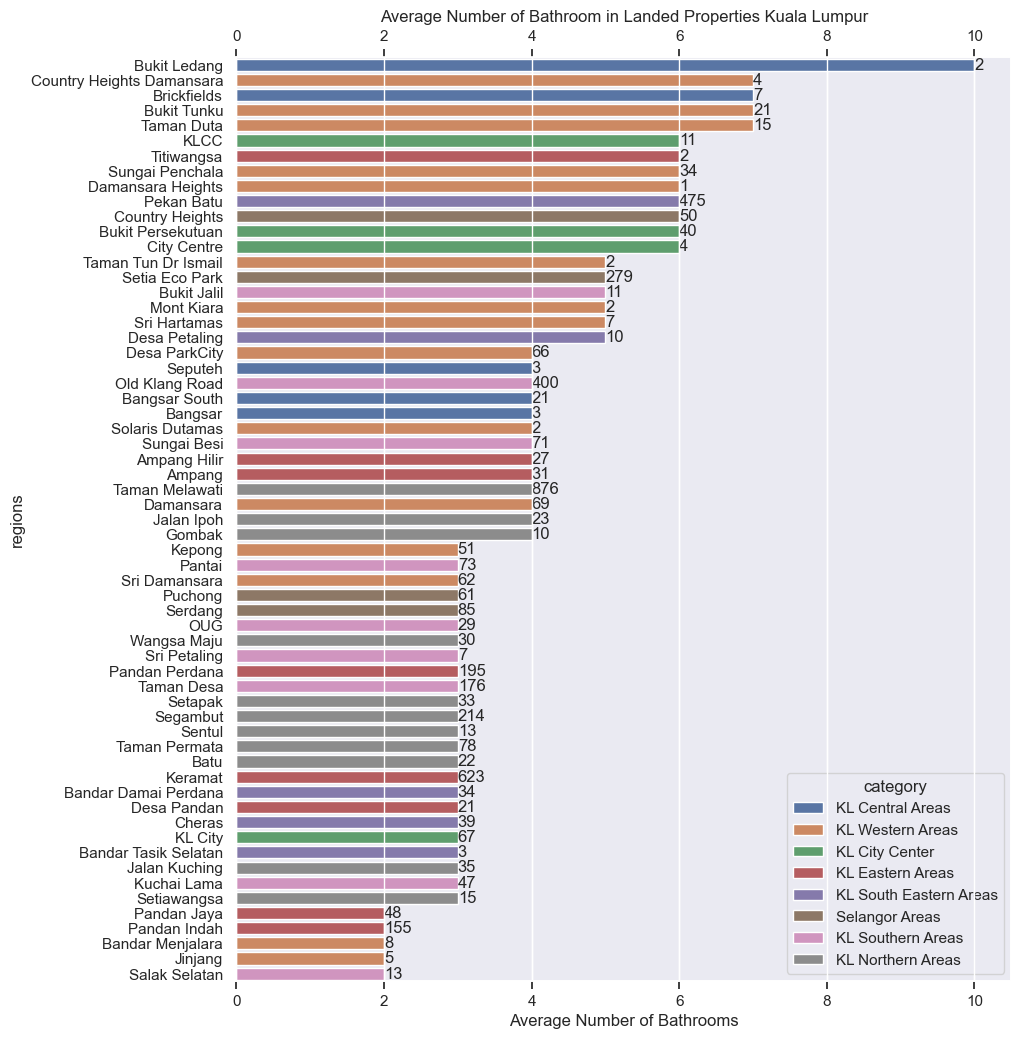

In [161]:
data = df_avg[df_avg['type'] == 'House'].sort_values(by = 'avg_bath', ascending = False)
f, ax1 = plt.subplots(figsize = (10,12))
sns.barplot(data = data, x = 'avg_bath', y = 'regions', hue = 'category', ax = ax1)
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
plt.title("Average Number of Bathroom in Landed Properties Kuala Lumpur")
ax1.set_xlabel("Average Number of Bathrooms")
for i , bar in enumerate(ax1.patches):
    if i < len(data):
        count = data['count'].iloc[i]
        ax1.text(bar.get_width(), (bar.get_y() + bar.get_height()/2), f'{count}',
                    va = 'center', ha = 'left')

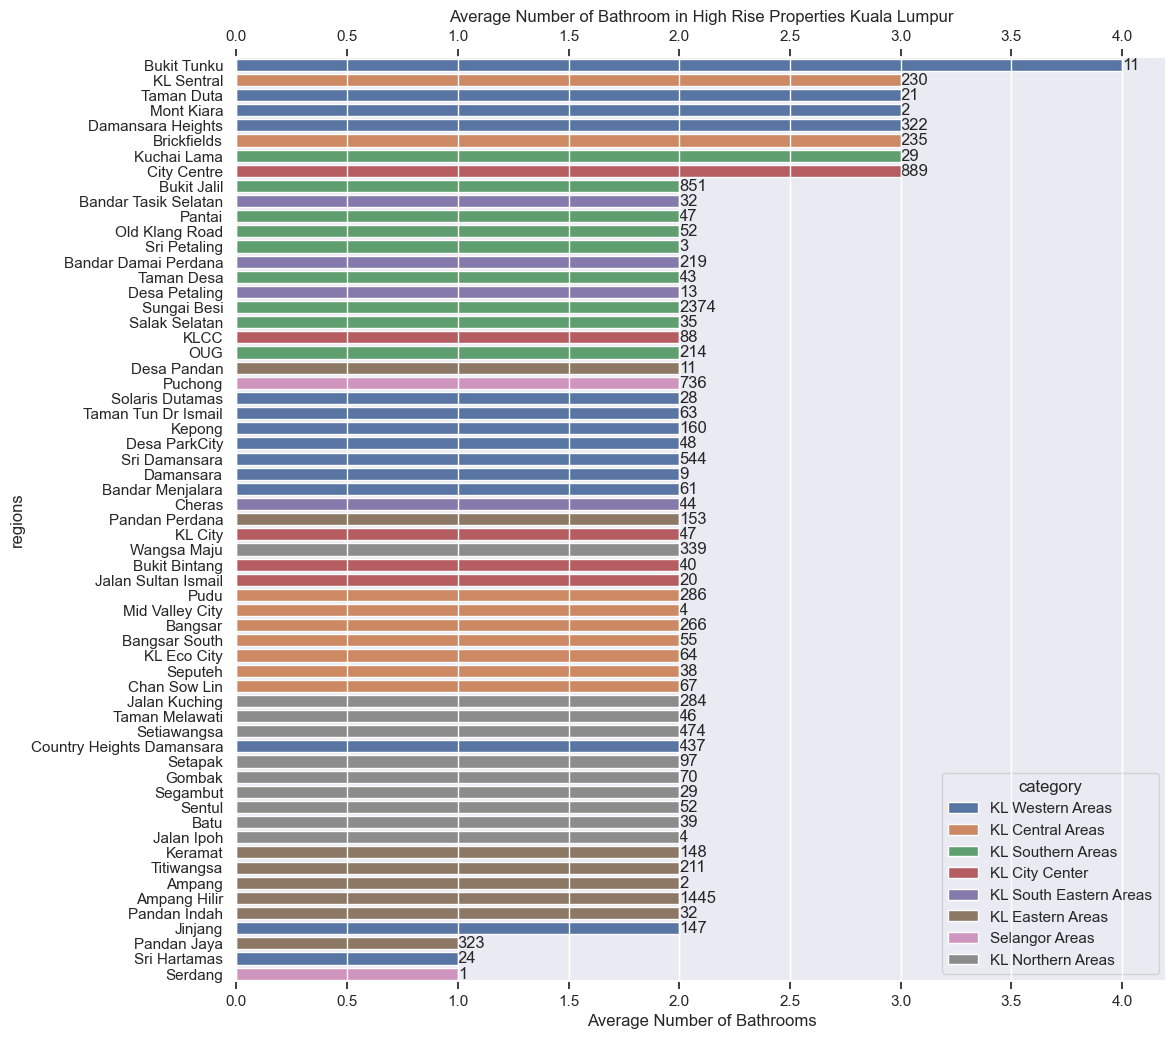

In [162]:
data = df_avg[df_avg['type'] == 'Apartment / Condominium'].sort_values(by = 'avg_bath', ascending = False)
f, ax1 = plt.subplots(figsize = (12,12))
sns.barplot(data = data, x = 'avg_bath', y = 'regions', hue = 'category', ax = ax1)
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
plt.title("Average Number of Bathroom in High Rise Properties Kuala Lumpur")
ax1.set_xlabel('Average Number of Bathrooms')
for i , bar in enumerate(ax1.patches):
    if i < len(data):
        count = data['count'].iloc[i]
        ax1.text(bar.get_width(), (bar.get_y() + bar.get_height()/2), f'{count}',
                    va = 'center', ha = 'left')

This notebook also serves as a starting point for exploring and understanding properties data in Kuala Lumpur,\
and there are abundance of opportunities for further analysis and exploration.

Really appreciate you taking your time to read this notebook of mine.\
Hope you gained some useful insights into the Malaysian property market and some data-preprocessing techniques.

Thank you for following along!